<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning_Avancada/blob/main/Deep_Learning_parte_2_como_a_rede_aprende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 Indo por dentro da rede neural**

## **O que acontece na rede**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [ ]:
dataset = keras.datasets.fashion_mnist
dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste))  = dataset.load_data()

In [ ]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 3.3069 - accuracy: 0.6465 - val_loss: 0.7854 - val_accuracy: 0.6955
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8395 - accuracy: 0.6782 - val_loss: 0.7078 - val_accuracy: 0.7156
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7911 - accuracy: 0.6892 - val_loss: 0.6740 - val_accuracy: 0.7202
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7455 - accuracy: 0.7105 - val_loss: 0.6083 - val_accuracy: 0.7886
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7385 - accuracy: 0.7254 - val_loss: 0.5749 - val_accuracy: 0.8070


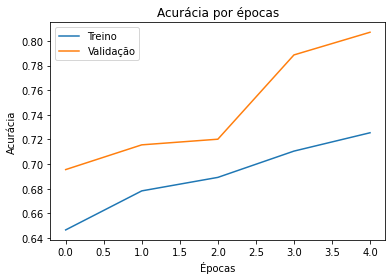

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treino', 'Validação'])

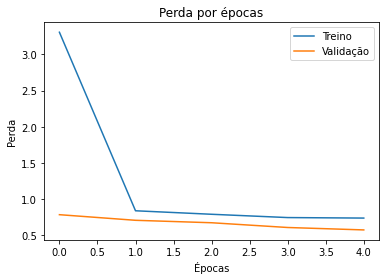

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [ ]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado testes:', np.argmax(testes_modelo_salvo[0]))
print('Número de imagem de testes:', identificacoes_teste[0])

Resultado testes: 9
Número de imagem de testes: 9


In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## **Valores propagados e pesos**

In [ ]:
modelo.layers[1].get_weights()[0]

array([[-0.06938067,  0.01195498, -0.03253914, ..., -0.00300951,
        -0.0003423 ,  0.03427068],
       [ 0.06244947, -0.01269994,  0.0626166 , ...,  0.02943039,
         0.02244314, -0.04813881],
       [-0.06064085,  0.02891224, -0.03765765, ...,  0.07144231,
        -0.07410022,  0.05303875],
       ...,
       [-0.0040773 , -0.01002108,  0.09605162, ...,  0.05801608,
         0.02790074,  0.00352967],
       [-0.08089018,  0.00517219, -0.0402425 , ...,  0.0046552 ,
         0.04731449, -0.07957544],
       [-0.04315675, -0.06826178,  0.05851157, ...,  0.06349991,
        -0.07287736,  0.06284805]], dtype=float32)

## **Refatorando**

In [ ]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[-0.06938067,  0.01195498, -0.03253914, ..., -0.00300951,
         -0.0003423 ,  0.03427068],
        [ 0.06244947, -0.01269994,  0.0626166 , ...,  0.02943039,
          0.02244314, -0.04813881],
        [-0.06064085,  0.02891224, -0.03765765, ...,  0.07144231,
         -0.07410022,  0.05303875],
        ...,
        [-0.0040773 , -0.01002108,  0.09605162, ...,  0.05801608,
          0.02790074,  0.00352967],
        [-0.08089018,  0.00517219, -0.0402425 , ...,  0.0046552 ,
          0.04731449, -0.07957544],
        [-0.04315675, -0.06826178,  0.05851157, ...,  0.06349991,
         -0.07287736,  0.06284805]], dtype=float32),
 array([-1.91489048e-02, -4.18739952e-02, -2.21289229e-02, -3.13607417e-02,
        -2.21344009e-02, -2.44264062e-02, -2.86258534e-02, -3.10114939e-02,
        -3.37245166e-02, -3.48941311e-02, -9.38522536e-03,  1.16136912e-02,
        -2.61057671e-02, -3.13752145e-02,  8.39822665e-02, -2.04601921e-02,
        -4.44976194e-03, -2.72448435e-02, -1.39741944e

# **02 Estudando os pesos e vieses**

## **Vieses**

Pesos

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.06938067,  0.01195498, -0.03253914, ..., -0.00300951,
        -0.0003423 ,  0.03427068],
       [ 0.06244947, -0.01269994,  0.0626166 , ...,  0.02943039,
         0.02244314, -0.04813881],
       [-0.06064085,  0.02891224, -0.03765765, ...,  0.07144231,
        -0.07410022,  0.05303875],
       ...,
       [-0.0040773 , -0.01002108,  0.09605162, ...,  0.05801608,
         0.02790074,  0.00352967],
       [-0.08089018,  0.00517219, -0.0402425 , ...,  0.0046552 ,
         0.04731449, -0.07957544],
       [-0.04315675, -0.06826178,  0.05851157, ...,  0.06349991,
        -0.07287736,  0.06284805]], dtype=float32)

Vieses

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-1.91489048e-02, -4.18739952e-02, -2.21289229e-02, -3.13607417e-02,
       -2.21344009e-02, -2.44264062e-02, -2.86258534e-02, -3.10114939e-02,
       -3.37245166e-02, -3.48941311e-02, -9.38522536e-03,  1.16136912e-02,
       -2.61057671e-02, -3.13752145e-02,  8.39822665e-02, -2.04601921e-02,
       -4.44976194e-03, -2.72448435e-02, -1.39741944e-02, -2.43219286e-02,
       -8.32785666e-03, -2.16525123e-02, -1.98744014e-02, -2.99638622e-02,
       -1.66168194e-02, -2.46007536e-02, -1.66440401e-02, -3.05828098e-02,
       -4.35629003e-02, -3.26112658e-02, -1.35598853e-02, -2.07626037e-02,
       -2.12466773e-02, -8.93477537e-03, -9.64035988e-02, -5.03344797e-02,
       -2.64794473e-03, -4.49128523e-02, -1.07194446e-02, -1.13718882e-02,
       -1.06936665e-02,  6.54818490e-03, -2.50382740e-02, -9.94320028e-03,
       -2.89943311e-02, -6.77425088e-03,  1.35457832e-02, -1.16751883e-02,
        1.37588426e-01, -6.43770536e-03, -1.58026367e-02, -1.19461287e-02,
       -1.86795611e-02, -

## **Zerando os pesos**

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.06938067,  0.01195498, -0.03253914, ..., -0.00300951,
        -0.0003423 ,  0.03427068],
       [ 0.06244947, -0.01269994,  0.0626166 , ...,  0.02943039,
         0.02244314, -0.04813881],
       [-0.06064085,  0.02891224, -0.03765765, ...,  0.07144231,
        -0.07410022,  0.05303875],
       ...,
       [-0.0040773 , -0.01002108,  0.09605162, ...,  0.05801608,
         0.02790074,  0.00352967],
       [-0.08089018,  0.00517219, -0.0402425 , ...,  0.0046552 ,
         0.04731449, -0.07957544],
       [-0.04315675, -0.06826178,  0.05851157, ...,  0.06349991,
        -0.07287736,  0.06284805]], dtype=float32)

In [ ]:
pesos_camada_dense.shape

(784, 256)

In [ ]:
pesos_camada_dense_zerados = np.zeros(((784, 256)))
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-1.91489048e-02, -4.18739952e-02, -2.21289229e-02, -3.13607417e-02,
        -2.21344009e-02, -2.44264062e-02, -2.86258534e-02, -3.10114939e-02,
        -3.37245166e-02, -3.48941311e-02, -9.38522536e-03,  1.16136912e-02,
        -2.61057671e-02, -3.13752145e-02,  8.39822665e-02, -2.04601921e-02,
        -4.44976194e-03, -2.72448435e-02, -1.39741944e-02, -2.43219286e-02,
        -8.32785666e-03, -2.16525123e-02, -1.98744014e-02, -2.99638622e-02,
        -1.66168194e-02, -2.46007536e-02, -1.66440401e-02, -3.05828098e-02,
        -4.35629003e-02, -3.26112658e-02, -1.35598853e-02, -2.07626037e-02,
        -2.12466773e-02, -8.93477537e-03, -9.64035988e-02, -5.03344797e-02,
        -2.64794473e-03, -4.49128523e-02, -1.0719444

In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3301 - accuracy: 0.4856 - val_loss: 0.9190 - val_accuracy: 0.6313
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1592 - accuracy: 0.5373 - val_loss: 0.9029 - val_accuracy: 0.6349
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1448 - accuracy: 0.5461 - val_loss: 0.8928 - val_accuracy: 0.6295
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1210 - accuracy: 0.5576 - val_loss: 0.9074 - val_accuracy: 0.6266
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1279 - accuracy: 0.5567 - val_loss: 0.8596 - val_accuracy: 0.6436


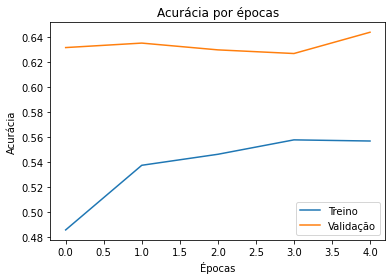

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treino', 'Validação'])

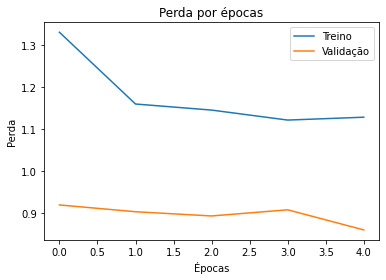

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'Validação'])

## **Deixando os pesos aleatórios**

In [ ]:
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
pesos_camada_dense_aleatorios

array([[0.11782659, 0.66460893, 0.82015404, ..., 0.48866492, 0.74987679,
        0.79408779],
       [0.15215818, 0.58761803, 0.72179262, ..., 0.0079958 , 0.75083057,
        0.65167346],
       [0.75396759, 0.00569482, 0.95158312, ..., 0.80605674, 0.36943275,
        0.52085206],
       ...,
       [0.4241521 , 0.22676634, 0.89088041, ..., 0.71427299, 0.49404864,
        0.55588461],
       [0.40980984, 0.4777163 , 0.68983871, ..., 0.23153252, 0.38678111,
        0.09754855],
       [0.49840574, 0.75934471, 0.41918607, ..., 0.05216811, 0.78592831,
        0.92488183]])

In [ ]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0.11782659, 0.66460896, 0.8201541 , ..., 0.48866493, 0.7498768 ,
         0.79408777],
        [0.15215819, 0.58761805, 0.72179264, ..., 0.0079958 , 0.7508306 ,
         0.65167344],
        [0.7539676 , 0.00569482, 0.95158315, ..., 0.80605674, 0.36943275,
         0.520852  ],
        ...,
        [0.4241521 , 0.22676635, 0.8908804 , ..., 0.714273  , 0.49404866,
         0.5558846 ],
        [0.40980983, 0.4777163 , 0.6898387 , ..., 0.23153251, 0.38678113,
         0.09754855],
        [0.49840572, 0.7593447 , 0.41918606, ..., 0.05216812, 0.7859283 ,
         0.9248818 ]], dtype=float32),
 array([-1.91489048e-02, -4.18739952e-02, -2.21289229e-02, -3.13607417e-02,
        -2.21344009e-02, -2.44264062e-02, -2.86258534e-02, -3.10114939e-02,
        -3.37245166e-02, -3.48941311e-02, -9.38522536e-03,  1.16136912e-02,
        -2.61057671e-02, -3.13752145e-02,  8.39822665e-02, -2.04601921e-02,
        -4.44976194e-03, -2.72448435e-02, -1.39741944e-02, -2.43219286e-02,
        -8.327

In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 10648.9385 - accuracy: 0.4115 - val_loss: 1706.4536 - val_accuracy: 0.7088
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2559.9407 - accuracy: 0.6029 - val_loss: 1808.6096 - val_accuracy: 0.6323
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 1188.1317 - accuracy: 0.6490 - val_loss: 860.8752 - val_accuracy: 0.6868
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 596.4458 - accuracy: 0.6803 - val_loss: 268.9641 - val_accuracy: 0.7683
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 298.9110 - accuracy: 0.7236 - val_loss: 187.2983 - val_accuracy: 0.7220


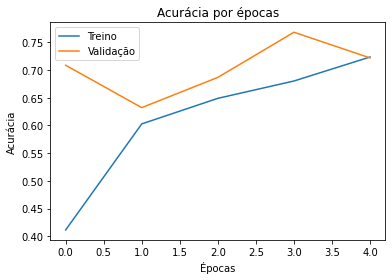

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treino', 'Validação'])

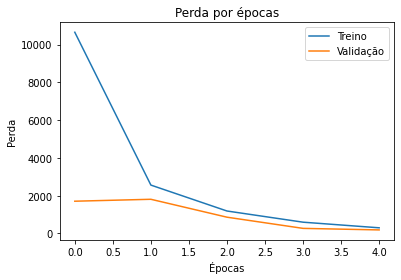

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

# **03 Entendendo as unidades e buscando a menor perda**

## **A mudança na classificação**

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.48783308, -1.2946459 ,  0.27159032, -0.71748114, -0.91223925,
       -0.5526537 , -0.9116333 , -0.36761484, -0.957028  ,  0.1978278 ,
       -0.39301825,  0.2614022 , -0.5207709 , -0.66499627, -0.04925497,
        0.10706717, -0.4344538 , -0.19146162, -0.6222482 , -0.36786026,
        0.27625895, -0.513858  , -0.86169827, -0.99566966, -0.05544624,
       -1.0129627 , -1.3422121 , -0.91803044, -0.1167152 , -1.0730903 ,
        0.09620749, -1.0588597 , -0.9264193 , -0.8773809 , -0.22231568,
       -1.6954248 ,  0.30386573, -1.0998797 , -1.1213629 , -0.26653773,
        0.6634388 , -0.29867414, -0.612431  , -1.1023146 , -0.24731056,
        0.02142259, -1.4065061 , -0.24600115, -0.22450133, -0.10344266,
       -0.7789995 , -0.07233977, -0.94582516, -0.24891077, -1.3407766 ,
        0.15623866, -0.20424336, -0.5294102 , -0.824125  , -0.1403706 ,
       -0.77871346, -0.10607827,  0.00453287,  0.68914884,  0.31383356,
       -0.51875484,  0.19331795,  0.58925486, -1.464502  ,  0.62

In [ ]:
vieses_camada_dense.shape

(256,)

In [ ]:
vieses_camada_dense_zerados = np.zeros(256,)
vieses_camada_dense_zerados

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados])
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.7430 - accuracy: 0.1011 - val_loss: 2.4953 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3915 - accuracy: 0.1011 - val_loss: 2.3303 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3113 - accuracy: 0.1007 - val_loss: 2.3036 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957


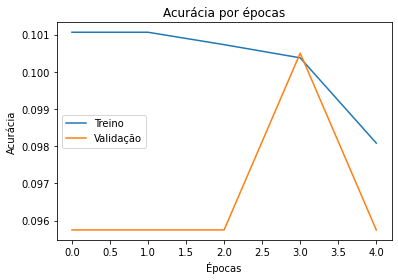

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treino', 'Validação'])

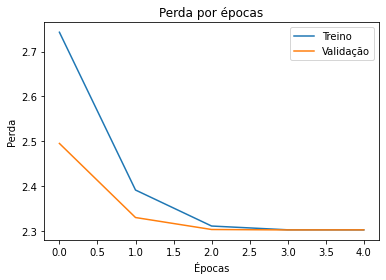

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0.11782659, 0.66460896, 0.8201541 , ..., 0.48866493, 0.7498768 ,
         0.79408777],
        [0.15215819, 0.58761805, 0.72179264, ..., 0.0079958 , 0.7508306 ,
         0.65167344],
        [0.7539676 , 0.00569482, 0.95158315, ..., 0.80605674, 0.36943275,
         0.520852  ],
        ...,
        [0.4241521 , 0.22676635, 0.8908804 , ..., 0.714273  , 0.49404866,
         0.5558846 ],
        [0.40980983, 0.4777163 , 0.6898387 , ..., 0.23153251, 0.38678113,
         0.09754855],
        [0.49840572, 0.7593447 , 0.41918606, ..., 0.05216812, 0.7859283 ,
         0.9248818 ]], dtype=float32),
 array([ 0.48783308, -1.2946459 ,  0.27159032, -0.71748114, -0.91223925,
        -0.5526537 , -0.9116333 , -0.36761484, -0.957028  ,  0.1978278 ,
        -0.39301825,  0.2614022 , -0.5207709 , -0.66499627, -0.04925497,
         0.10706717, -0.4344538 , -0.19146162, -0.6222482 , -0.36786026,
         0.27625895, -0.513858  , -0.86169827, -0.99566966, -0.05544624,
        -1.0129627 , -1.34221

In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2391.0542 - accuracy: 0.3638 - val_loss: 652.3140 - val_accuracy: 0.5960
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 858.5492 - accuracy: 0.5584 - val_loss: 764.2557 - val_accuracy: 0.5833
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 473.2591 - accuracy: 0.6482 - val_loss: 360.3569 - val_accuracy: 0.6298
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 238.1377 - accuracy: 0.7061 - val_loss: 164.6979 - val_accuracy: 0.7230
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 90.2335 - accuracy: 0.7468 - val_loss: 57.8860 - val_accuracy: 0.7732


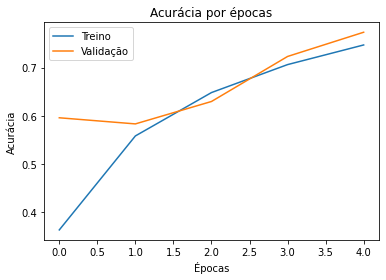

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treino', 'Validação'])

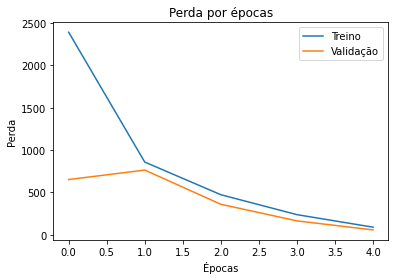

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None